In [15]:
import GetOldTweets3 as got
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from time import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

In [22]:
loaded_model = pickle.load(open('multiNB_model.sav', 'rb'))

In [3]:
loaded_model.predict(['goodbye'])

array([0])

In [4]:
stocks = pd.read_csv('stockname.csv')
stocks.head()
stocks = stocks[['Symbol', 'Name', 'Sector', 'combined_names']]
print(stocks.head())

  Symbol                 Name                  Sector           combined_names
0    MMM           3M Company             Industrials           MMM 3M Company
1    AOS      A.O. Smith Corp             Industrials      AOS A.O. Smith Corp
2    ABT  Abbott Laboratories             Health Care  ABT Abbott Laboratories
3   ABBV          AbbVie Inc.             Health Care         ABBV AbbVie Inc.
4    ACN        Accenture plc  Information Technology        ACN Accenture plc


In [5]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('apple inc')\
                                           .setSince("2019-04-02")\
                                           .setUntil("2019-04-11")\
                                           .setMaxTweets(5000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)
df = pd.DataFrame(tweet)
print(tweet)

[<GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd355fd0>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd0c65f8>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd0c6940>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd0c6cc0>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfcfce240>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd0c6d68>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd355ef0>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd0c60f0>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd0c6c88>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfcfce630>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfcfce898>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfcfcecc0>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4d6c09c3c8>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd0c65c0>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfd0c69e8>, <GetOldTweets3.models.Tweet.Tweet object at 0x7f4cfcfce780>, <GetOldTweets3.models.T

In [1]:


##   print(tweet[i].text)

In [45]:
result = []
i = 0
sum = 0;
for i in range(0,len(tweet)):
    tweet[i] = tweet_cleaner_updated(tweet[i].text)
    result = loaded_model.predict([tweet[i]])
    sum = result[0] + sum
    
    


In [46]:
print(sum)
print(sum/len(tweet))
print(len(tweet))

211
0.8978723404255319
235


In [60]:
dates = ["2019-04-15","2019-04-16", "2019-04-17", "2019-04-18", "2019-04-19"]
for i in range(0,5):
    print(i)
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('CHGG chegg')\
                                           .setSince(dates[i])\
                                           .setUntil(dates[i+1])\
                                           .setMaxTweets(5000)
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    result = []
    tweets = []
    sum = 0;
    for j in range(0,len(tweet)):
        #print(tweet[j].text)
        tweet[j] = tweet_cleaner_updated(tweet[j].text)
        result = loaded_model.predict([tweet[j]])
        #print(result)
        sum = result[0] + sum
    print(sum)
    print(sum/len(tweet))
    print(len(tweet))
    del(result)
    del(tweet)
    

0
32
0.8888888888888888
36
1
31
0.8611111111111112
36
2
68
0.9315068493150684
73
3
41
0.9761904761904762
42
4
31
0.8611111111111112
36


In [218]:
def clean(list1, date, date1, i):
    tweets = []
    tmpTweets1 = list1
    current = date1[i]
    nextday = date1[i+1]
    #print(tmpTweets)
    #print(len(tmpTweets))
    #print(type(tmpTweets[0].created_at))
    #username = sys.argv[1]
    #for tweet in tmpTweets:
        #print(tweet.created_at)
    tmpTweets = list1
    for tweet in tmpTweets:
        bob = tweet.date
        bob = bob.replace(tzinfo=None)
        if bob < nextday and bob > current:
            #print("here")
            tweets.append(tweet.text)

    ##while (tmpTweets[-1].created_at > datetimes[i]):
      #  tmpTweets = api.user_timeline(username, max_id = tmpTweets[-1].id)
       # for tweet in tmpTweets:
        #    if tweet.created_at < datetimes[i+1] and tweet.created_at > [i]:
         #       tweets.append(tweet)
    
    return tweets
    

In [10]:
stocks['combined_names'] = combined_names

In [11]:
import datetime
dates = ['2019-04-15','2019-04-16','2019-04-17','2019-04-18','2019-04-19', '2019-04-20']
a = datetime.datetime(2019, 4, 15, 0, 0, 0)
b = datetime.datetime(2019, 4, 16, 0, 0, 0)
c = datetime.datetime(2019, 4, 17, 0, 0, 0)
d = datetime.datetime(2019, 4, 18, 0, 0, 0)
e = datetime.datetime(2019, 4, 19, 0, 0, 0)
f = datetime.datetime(2019, 4, 20, 0, 0, 0)
import datetime
import pytz

utc=pytz.UTC

dates1 = [a,b,c,d,e, f]
type(dates1[0])
#a = a.replace(tzinfo=utc)
#b = b.replace(tzinfo=utc)
#b = c.replace(tzinfo=utc)
#d = d.replace(tzinfo=utc)
#e = e.replace(tzinfo=utc)
#f = f.replace(tzinfo=utc)
dates1 = [a,b,c,d,e, f]
april = []

for i in range(19):
    
    april.append(datetime.datetime(2019, 3, i+1, 0, 0, 0))
    

In [216]:
april

[datetime.datetime(2019, 3, 1, 0, 0),
 datetime.datetime(2019, 3, 2, 0, 0),
 datetime.datetime(2019, 3, 3, 0, 0),
 datetime.datetime(2019, 3, 4, 0, 0),
 datetime.datetime(2019, 3, 5, 0, 0),
 datetime.datetime(2019, 3, 6, 0, 0),
 datetime.datetime(2019, 3, 7, 0, 0),
 datetime.datetime(2019, 3, 8, 0, 0),
 datetime.datetime(2019, 3, 9, 0, 0),
 datetime.datetime(2019, 3, 10, 0, 0),
 datetime.datetime(2019, 3, 11, 0, 0),
 datetime.datetime(2019, 3, 12, 0, 0),
 datetime.datetime(2019, 3, 13, 0, 0),
 datetime.datetime(2019, 3, 14, 0, 0),
 datetime.datetime(2019, 3, 15, 0, 0),
 datetime.datetime(2019, 3, 16, 0, 0),
 datetime.datetime(2019, 3, 17, 0, 0),
 datetime.datetime(2019, 3, 18, 0, 0),
 datetime.datetime(2019, 3, 19, 0, 0)]

In [172]:
data = []
for name in df['Name']:
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(name)\
                                           .setSince("2019-03-00")\
                                           .setUntil("2019-04-01")\
                                           .setMaxTweets(5000)
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    list1 = tweet
    for i in range(len(april)):
        list2 = clean(list1, april, april, i)
        data.append({'name':name,'date':dates[0], 'tweets': list2})
    list2 = clean(list1, dates, dates1, 0)
    for i in range(len(list2)):
    	list2[i] = list2[i].text
    data.append({'name':name,'date':dates[0], 'tweets': list2})
    list3 = clean(list1, dates, dates1, 1)
    for i in range(len(list3)):
    	list3[i] = list3[i].text
    data.append({'name':name,'date':dates[1], 'tweets': list3})
    list4 = clean(list1, dates, dates1, 2)
    for i in range(len(list4)):
    	list4[i] = list4[i].text
    data.append({'name':name,'date':dates[2], 'tweets': list4})
    list5 = clean(list1, dates, dates1, 3)
    for i in range(len(list5)):
    	list5[i] = list5[i].text
    data.append({'name':name,'date':dates[3], 'tweets': list5})
    list6 = clean(list1, dates, dates1, 4)
    for i in range(len(list6)):
    	list6[i] = list6[i].text
    data.append({'name':name,'date':dates[4], 'tweets': list6})
    print(name)
finaldf = pd.DataFrame(data)
#print(finaldf.head())
finaldf.to_csv('finaldfgot3')

3M Company
A.O. Smith Corp
Abbott Laboratories
AbbVie Inc.
Accenture plc
Activision Blizzard
Acuity Brands Inc
Adobe Systems Inc
Advance Auto Parts
Advanced Micro Devices Inc
AES Corp
Aetna Inc
Affiliated Managers Group Inc
AFLAC Inc
Agilent Technologies Inc
Air Products & Chemicals Inc
Akamai Technologies Inc
Alaska Air Group Inc
Albemarle Corp


KeyboardInterrupt: 

In [21]:
stock_data = pd.DataFrame(columns=['Averages', 'Total'])
for index, row in stocks.iterrows():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(row['Name'])\
                                           .setSince("2018-05-01")\
                                           .setUntil("2018-06-01")
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    result = []
    i = 0
    sum = 0;
    
    if(len(tweet) != 0):
        for i in range(0,len(tweet)):
            #result = loaded_model.predict([tweet[i].text])
            sum = 1 + sum
        average = sum/len(tweet)
        print(row['combined_names'])
        stock_data = stock_data.append({'Averages': average, 'Total': len(tweet)}, ignore_index=True)
    
    

MMM 3M Company
AOS A.O. Smith Corp


KeyboardInterrupt: 

In [22]:
stock_data = pd.DataFrame(columns=['Averages', 'Total'])
for index, row in stocks.iterrows():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(row['Name'])\
                                           .setSince("2018-05-01")\
                                           .setUntil("2018-06-01")
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    result = []
    i = 0
    sum = 0;
    
    print(len(tweet))

1628
37
825
328
0


In [ ]:
smalllist = []
biglist = []
stock_data = pd.DataFrame(columns=['Averages', 'Total'])
for row in df['Name']:
    entry = str('$')+str(row)
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(entry)\
                                           .setSince("2019-04-12")\
                                           .setUntil("2019-04-20")
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    

2287
$MMM
417
$AOS
2213
$ABT


In [ ]:
stock_data = pd.DataFrame(columns=['Averages', 'Total'])
for index, row in stocks.iterrows():
    entry = str('$')+str(row['Symbol'])
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(entry)\
                                           .setSince("2018-05-01")\
                                           .setUntil("2018-06-01")
                                           .setTopTweets(True)\
                                           .setMaxTweets(10)
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    result = []
    i = 0
    sum = 0;
    
    print(len(tweet))
    print(entry)

In [11]:
tweets_final = pd.DataFrame()
df = pd.read_csv('constituents_csv.csv')
df['Symbol']

0        MMM
1        AOS
2        ABT
3       ABBV
4        ACN
5       ATVI
6        AYI
7       ADBE
8        AAP
9        AMD
10       AES
11       AET
12       AMG
13       AFL
14         A
15       APD
16      AKAM
17       ALK
18       ALB
19       ARE
20      ALXN
21      ALGN
22      ALLE
23       AGN
24       ADS
25       LNT
26       ALL
27     GOOGL
28      GOOG
29        MO
       ...  
475     VRTX
476     VIAB
477        V
478      VNO
479      VMC
480      WMT
481      WBA
482       WM
483      WAT
484      WEC
485      WFC
486     WELL
487      WDC
488       WU
489      WRK
490       WY
491      WHR
492      WMB
493     WLTW
494      WYN
495     WYNN
496      XEL
497      XRX
498     XLNX
499       XL
500      XYL
501      YUM
502      ZBH
503     ZION
504      ZTS
Name: Symbol, Length: 505, dtype: object

In [63]:
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('INPX', 'google', start_date, end_date)


NameError: name 'data' is not defined

In [4]:
from pandas import datareader
import matplotlib.pyplot as plt
import pandas as pd

ImportError: cannot import name 'datareader'

In [ ]:
from yahoo_finance import Share
yahoo = Share('AAPL')
print(yahoo.get_open())


In [3]:
import pandas as pd
import quandl
import datetime

# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2018,1,1)
end = datetime.date.today()

# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end, collapse = 'monthly')

type(apple)
print(apple.head())

              Open      High     Low   Close      Volume  Ex-Dividend  \
Date                                                                    
2018-01-31  166.87  168.4417  166.50  167.43  30984099.0          0.0   
2018-02-28  179.26  180.6150  178.05  178.12  33604574.0          0.0   
2018-03-31  173.68  175.1500  166.92  168.34  38962839.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-01-31          1.0     166.87   168.4417    166.50      167.43   
2018-02-28          1.0     179.26   180.6150    178.05      178.12   
2018-03-31          1.0     173.68   175.1500    166.92      168.34   

            Adj. Volume  
Date                     
2018-01-31   30984099.0  
2018-02-28   33604574.0  
2018-03-31   38962839.0  


In [38]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [ ]:
dates = ["2015-05-30", "2015-06-30", "2015-07-30", "2015-08-30", "2015-09-30", "2015-10-30"]
for i in range(0,5):
    print(i)
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('CHGG chegg')\
                                           .setSince(dates[i])\
                                           .setUntil(dates[i+1])\
                                           .setMaxTweets(5000)
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    result = []
    tweets = []
    sum = 0;
    for j in range(0,len(tweet)):
        #print(tweet[j].text)
        tweet[j] = tweet_cleaner_updated(tweet[j].text)
        result = loaded_model.predict([tweet[j]])
        #print(result)
        sum = result[0] + sum
    print(sum)
    print(sum/len(tweet))
    print(len(tweet))
    del(result)
    del(tweet)
    

In [111]:
finaldf.drop(finaldf[finaldf['date'] == '2019-04-19'].index, inplace = True)

In [25]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [20]:
loaded_model = pickle.load(open('multiNB_model.sav', 'rb'))

NameError: name 'pickle' is not defined

In [27]:
total = []
stri = []
for tweet in tweet_lists:
    stri = []
    for i in range(len(tweet)):
        if(len(tweet) != 0):
            stri.append(tweet_cleaner_updated(tweet[i]))
    total.append(stri)
    

In [18]:
import re
tweet_lists = []
counter = 0
for row in longdf['tweets']:
    regex = re.compile(r"'[^']*'")
    p = regex.findall(row)
    tweet_lists.append(p)
    counter = counter + 1
    print(counter)
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


In [28]:
longdf['tweets'] = tweet_lists 

In [29]:
longdf['clean'] = total

In [30]:
number_of_tweet = []
avg_score = []
standard_dev = []
for row in tweet_lists:
    if(len(row) != 0):
        pos = loaded_model.predict(row)
        avg_score.append(pos.sum()/len(pos))
        standard_dev.append(pos.std())
        number_of_tweet.append(len(pos))
    else:
        #pos = loaded_model.predict(row)
        avg_score.append(-1)
        standard_dev.append(-1)
        number_of_tweet.append(-1)

In [31]:
longdf['number_of_tweet'] = number_of_tweet
longdf['avg_score'] = avg_score
longdf['standard_dev'] = standard_dev

In [58]:
lu = pd.read_csv('Tom')

In [33]:
longdf[:]

,Unnamed: 0,date,name,tweets,clean,number_of_tweet,avg_score,standard_dev
0,0,2019-03-01,Apple Inc,['Rebel Inc . - Ndemic Creations has been publ...,[rebel inc ndemic creations has been published...,117,0.239316,0.426666
1,1,2019-03-02,Apple Inc,"['Milk , Sly start from the same bloody degrad...",[milk sly start from the same bloody degraded ...,115,0.634783,0.481491
2,2,2019-03-03,Apple Inc,"['s make it the smallest, thinnest, slipperies...",[make it the smallest thinnest slipperiest thi...,140,0.385714,0.486764
3,3,2019-03-04,Apple Inc,['Defence + Indemnity - February 2019: Case Su...,[defence indemnity february case summary modis...,143,0.489510,0.499890
4,4,2019-03-05,Apple Inc,['American online news and social networking s...,[american online news and social networking se...,157,0.331210,0.470648
5,5,2019-03-06,Apple Inc,"['Funny enough, Outlook used to be Tim’s prima...",[funny enough outlook used to be tim primary m...,168,0.511905,0.499858
6,6,2019-03-07,Apple Inc,"['Apple inc is “MINE”', 'Apple CEO trumps Trum...","[apple inc is mine, apple ceo trumps trump ref...",178,0.404494,0.490794
7,7,2019-03-08,Apple Inc,"['s, one an activity tracker, one for golf. An...",[one an activity tracker one for golf an apple...,165,0.460606,0.498446
8,8,2019-03-09,Apple Inc,['dozens of things that Apple may not care abo...,[dozens of things that apple may not care abou...,92,0.532609,0.498936
9,9,2019-03-10,Apple Inc,['Thanks to @AppleInc _AAPL we don’t have to m...,[thanks to aapl we don have to mimic dick trac...,86,0.837209,0.369175


In [60]:
finaldf['prices'] = lu['prices']

In [1]:
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(5, 5))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

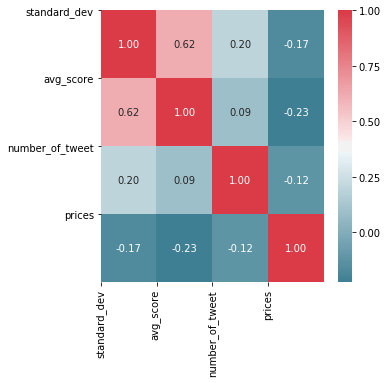

In [264]:
heatMap(longdf[['standard_dev', 'avg_score', 'number_of_tweet', 'prices']])

In [40]:
longdf.drop(longdf[longdf['prices'] == -100].index, inplace = True) 

In [9]:
longdf = pd.read_csv('longdf')

120

In [116]:
finaldf.drop(finaldf[finaldf['number_of_tweet'] < 100].index, inplace = True) 

In [31]:
up_down = []
for row in longdf['prices']:
    if(row > 0):
        up_down.append(1)
    else:
        up_down.append(0)
        
spread = []
for row in longdf['standard_dev']:
    if(row > 1.5):
        spread.append(1)
    else:
        spread.append(0)
        
score = []
for row in longdf['avg_score']:
    if(row > 0.5):
        score.append(1)
    else:
        score.append(0)

In [32]:
#lu['standard_dev_bin'] = spread
longdf['prices_bin'] = up_down
#lu['score_bins'] = score

In [12]:
features = np.array(longdf[['avg_score', 'number_of_tweet']])
target = np.array(longdf['prices_bin'])

In [13]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.25, random_state = 425)

In [17]:
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

In [18]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(target_test, target_pred)

0.6

In [20]:
X_test = features_test
y_test = target_test

In [21]:
if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
    null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
else:
    null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))

In [22]:
null_accuracy

0.5333333333333333

In [23]:
target_test

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1])

In [24]:
target_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [25]:
bigguys = ['Apple Inc', 'Microsoft Corp.', 'Amazon.com Inc.', 'Facebook Inc.', 'Berkshire Hathaway', 'JP Morgan Chase & Co', 'Exxon Mobil Corp.','Alphabet Inc C'
,'Alphabet Inc A'
,'Johnson & Johnson']

In [26]:
data = []
for name in bigguys:
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(name)\
                                           .setSince("2019-03-01")\
                                           .setUntil("2019-03-20")
                                           #.setMaxTweets(5000)
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    list1 = tweet
    print(name)
    for i in range(len(april) - 1):
        list2 = clean(list1, april, april, i)
        data.append({'name':name,'date':april[i], 'tweets': list2})
        #print(data)
longdf = pd.DataFrame(data)
#print(finaldf.head())
longdf.to_csv('longdf')

KeyboardInterrupt: 

In [5]:
longdf = pd.read_csv('longdf')

In [198]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Apple inc')\
                                           .setSince("2019-03-01")\
                                           .setUntil("2019-03-29")
                                           #.setMaxTweets(5000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

In [9]:
from iexfinance.stocks import get_historical_data

In [38]:
prices = []
counter = 0
#df = df[:]
for row in bigsym:
    counter = counter + 1
    print(counter)
    print(row)
    
    if((1==1)):
        data = get_historical_data(row, april[0], april[len(april) - 1])
        data = pd.DataFrame(data)
        for i in range(len(april) - 1):
            if((datesss[i] != '2019-03-02') & (datesss[i] != '2019-03-03') & (datesss[i] != '2019-03-09') & (datesss[i] != '2019-03-10') & (datesss[i] != '2019-03-16') & (datesss[i] != '2019-03-17')):
                prices.append((data.loc['close'][datesss[i]]- data.loc['open'][datesss[i]])/data.loc['open'][datesss[i]])
            else:
                prices.append(-100)
        #prices.append((data.loc['close']['2019-04-16']- data.loc['open']['2019-04-16'])/data.loc['open']['2019-04-16'])
        #prices.append((data.loc['close']['2019-04-17']- data.loc['open']['2019-04-17'])/data.loc['open']['2019-04-17'])
        #prices.append((data.loc['close']['2019-04-18']- data.loc['open']['2019-04-18'])/data.loc['open']['2019-04-18'])
    else:
        prices.append(0)
        prices.append(0)
        prices.append(0)
        prices.append(0)

1
AAPL
2
MSFT
3
AMZN
4
FB
5
BRK.B
6
JPM
7
XOM
8
GOOG
9
GOOGL
10
JNJ


In [202]:
['AAPL',
'MSFT',
'AMZN',
'FB',
'BRK.B',
'JPM',
'XOM',
'GOOG',
'GOOGL',
'JNJ']

['AAPL', 'MSFT', 'AMZN', 'FB', 'BRK.B', 'JPM', 'XOM', 'GOOG', 'GOOGL', 'JNJ']

In [7]:
bigsym = ['AAPL',
'MSFT',
'AMZN',
'FB',
'BRK.B',
'JPM',
'XOM',
'GOOG',
'GOOGL',
'JNJ']

In [27]:
longdf[:]

,Unnamed: 0,Unnamed: 0.1,date,name,tweets,clean,number_of_tweet,avg_score,standard_dev,prices,prices_bin
0,0,0,2019-03-01,Apple Inc,"[""'Rebel Inc . - Ndemic Creations has been pub...",['rebel inc ndemic creations has been publishe...,117,0.239316,0.426666,0.003959,1
1,3,3,2019-03-04,Apple Inc,"[""'Defence + Indemnity - February 2019: Case S...",['defence indemnity february case summary modi...,143,0.489510,0.499890,0.000911,1
2,4,4,2019-03-05,Apple Inc,['\'American online news and social networking...,['american online news and social networking s...,157,0.331210,0.470648,-0.002330,0
3,5,5,2019-03-06,Apple Inc,"[""'Funny enough, Outlook used to be Tim’s prim...",['funny enough outlook used to be tim primary ...,168,0.511905,0.499858,-0.000859,0
4,6,6,2019-03-07,Apple Inc,"[""'Apple inc is “MINE”'"", ""'Apple CEO trumps T...","['apple inc is mine', 'apple ceo trumps trump ...",178,0.404494,0.490794,-0.007879,0
5,7,7,2019-03-08,Apple Inc,"['\'s, one an activity tracker, one for golf. ...",['one an activity tracker one for golf an appl...,165,0.460606,0.498446,0.015207,1
6,10,10,2019-03-11,Apple Inc,"[""'Rebel Inc . - Ndemic Creations has been pub...",['rebel inc ndemic creations has been publishe...,191,0.308901,0.462040,0.019431,1
7,11,11,2019-03-12,Apple Inc,"[""'Apple Inc . continues to struggle with iPho...",['apple inc continues to struggle with iphone ...,362,0.348066,0.476357,0.005056,1
8,12,12,2019-03-13,Apple Inc,"[""'Apple Rush Company, Inc . produces first ru...",['apple rush company inc produces first run of...,145,0.600000,0.489898,-0.002963,0
9,13,13,2019-03-14,Apple Inc,"[""'bro i frfr just made airpods its so easy an...",['bro frfr just made airpods its so easy and s...,164,0.378049,0.484900,-0.000924,0


In [13]:
datesss=  ['2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04', '2019-03-05', '2019-03-06','2019-03-07','2019-03-08','2019-03-09','2019-03-10','2019-03-11','2019-03-12','2019-03-13','2019-03-14','2019-03-15','2019-03-16','2019-03-17','2019-03-18','2019-03-19',]

In [33]:
lu[:]

,Unnamed: 0,date,Unnamed: 0.1,name,tweets,prices,tweet_lists,word_lists,number_of_tweet,avg_score,standard_dev,prices_bin
0,0,2019-04-15,0,3M Company,"['RT @DivvyHQ: Struggling to create impactful,...",-0.004658,"[""'RT @DivvyHQ: Struggling to create impactful...",['rt struggling to create impactful creative s...,52,0.807692,0.394113,0
1,1,2019-04-16,1,3M Company,['RT @lilyjamali: NEW: PG&amp;E reveals detail...,0.001431,"[""'RT @lilyjamali: NEW: PG&amp;E reveals detai...",['rt new pg reveals details of incoming ce bil...,440,0.713636,0.452061,1
2,2,2019-04-17,2,3M Company,['RT @kenvogel: NEW FEC FILINGS: The TRUMP cam...,0.000046,"[""'RT @kenvogel: NEW FEC FILINGS: The TRUMP ca...",['rt new fec filings the trump campaign paid i...,111,0.243243,0.429041,1
3,3,2019-04-18,3,3M Company,['@mopeng @MsMariaT @Agenthades1 “Sater and Ri...,0.004129,"[""'@mopeng @MsMariaT @Agenthades1 “Sater and R...",['sater and ridloff worked closely with elvira...,45,0.777778,0.415740,1
4,4,2019-04-15,5,A.O. Smith Corp,['Institutional Investor Sentiment About Smith...,0.000900,"[""'Institutional Investor Sentiment About Smit...",['institutional investor sentiment about smith...,1,1.000000,0.000000,1
5,5,2019-04-16,6,A.O. Smith Corp,['$0.27 EPS Expected for OGE Energy Corp. $OGE...,0.001970,"[""'$0.27 EPS Expected for OGE Energy Corp. $OG...",['eps expected for oge energy corp oge smith a...,1,1.000000,0.000000,1
6,6,2019-04-17,7,A.O. Smith Corp,[],-0.003381,[],[],-1,-1.000000,-1.000000,0
7,7,2019-04-18,8,A.O. Smith Corp,[],0.007311,[],[],-1,-1.000000,-1.000000,1
8,8,2019-04-15,10,Abbott Laboratories,['Online Dietary Supplement Market Astonishing...,-0.007809,"[""'Online Dietary Supplement Market Astonishin...",['online dietary supplement market astonishing...,51,0.333333,0.471405,0
9,9,2019-04-16,11,Abbott Laboratories,['#AbbottLaboratories $ABT BidaskScore is Lowe...,-0.020015,"[""'#AbbottLaboratories $ABT BidaskScore is Low...",['abbottlaboratories abt bidaskscore is lowere...,107,0.887850,0.315550,0


In [233]:
data.loc['close']['2019-03-02']

KeyError: '2019-03-02'

In [239]:
len(prices)

180

In [39]:
longdf['prices'] = prices

In [241]:
longdf['prices'] = prices